# Comprehensive pyhton data analysis of IPL data_Part2
- **https://datascienceplus.com/introduction-to-data-analysis-in-python-with-ipl-dataset?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)**
- **https://www.kaggle.com/nulldata/begin-your-data-analysis-in-python-with-ipl-data/**
- **https://techtrunk.in/ipl-data-analysis/**
- https://www.kaggle.com/dude431/ipl-complete-analysis-part-1
- https://www.kaggle.com/adikeshri/ipl-a-complete-analysis
- https://www.kaggle.com/dude431/ipl-analysis-part-2-fantasy-league-edition
 

# Questions to Solve

**Link (https://www.kaggle.com/dude431/ipl-complete-analysis-part-1)**
**Link (https://www.kaggle.com/adikeshri/ipl-a-complete-analysis)**
**Link(https://www.kaggle.com/dude431/ipl-analysis-part-2-fantasy-league-edition)**

1.	Matches Played vs Wins by Each Team¶
2.	Total no. of wins by each team
3.	Venue of Most Matches
4.	Matches hosted in each city
5.	Favorite Umpire
6.	Runs per Season (average and total runs)
7.	Run Distribution Over Years
8.	Target of 200 Runs or More
9.	How many times each Team scored > 200
10.	Is it possible to chase >200 Target
11.	Average Score of Each Team Per Season
12.	Runs Per over of Each Team
13.	Top 20 players with most MOM awards
14.	Season wise match summary of matches won by runs
15.	Biggest win by runs each season
16.	Most successful IPL team

**PowerPlay Analysis**
17.	Runs in Powerplay of Each Match
18.	Powerplay Average Runs
19.	Powerplay Average Dismissals

**Batsman Data**
20.	Highest Average and Strike rate for >50 Matches
21.	Top 20 Batsman
22.	Top 10 Batsman in each run category
23.	Orange Cap Holders
24.	Centuries and half centuries analysis
25.	Boundaries and total runs analysis
26.	Comparison between Batsman
27.	Comparison between Batsman

**Bowlers Analysis**
28.	Best Bowler in Each category (top 20 wicket takers)
29.	Purple Cap Holders
30.	Bowlers with maximum dismissals analysis
31.	Best bowlers in each economy range
32.	Bowlers with maximum economy and maiden points
33.	Bowlers with maximum points analysis
34.	Comparison Between Bowlers

**Winner Analysis**
35.	Which team win highest no. of seasons
36.	Match Played vs wins in Final Match of Every Season
37.	Is Toss Decision is Final Decision in Finals ? 
38.	Man of the matches

**Fielder Analysis**
39.	Fielder with maximum catches
40.	Fielder with maximum points
41.	Fielders and Wicketkeepers with maximum points

**MI vs CSK**
a.	MI vs CSK head to head
b.	MI vs CSK - Best performers
c.	Toss decision statistics for all MIvCSK matches - Venue wise
d.	Decision upon winning the toss by both teams


In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
# Load dataset
ball= pd.read_csv("deliveries_2019.csv")
mat= pd.read_csv("matches_2019.csv")

In [3]:
ball= ball.replace(to_replace= "Delhi Daredevils", value= "Delhi Capitals")
mat= mat.replace(to_replace= "Delhi Daredevils", value= "Delhi Capitals")

#### 1. Matches Played vs Wins by Each Team¶

In [4]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [22]:
m= pd.concat ([mat["team1"], mat["team2"]])
m= m.value_counts().reset_index()
m.columns=["Team", "Total_matches"]
m["wins"]= mat["winner"].value_counts().reset_index()["winner"]
m.set_index("Team", inplace=True)
m

,Total_matches,wins
Team,,
Mumbai Indians,187,109
Royal Challengers Bangalore,180,100
Kolkata Knight Riders,178,92
Delhi Capitals,177,84
Kings XI Punjab,176,82
Chennai Super Kings,164,77
Rajasthan Royals,147,75
Sunrisers Hyderabad,108,58
Deccan Chargers,75,29


In [26]:
# win percentage
m_per=round(m["wins"]/m["Total_matches"]*100,2)
m_per

Team
Mumbai Indians                 58.29
Royal Challengers Bangalore    55.56
Kolkata Knight Riders          51.69
Delhi Capitals                 47.46
Kings XI Punjab                46.59
Chennai Super Kings            46.95
Rajasthan Royals               51.02
Sunrisers Hyderabad            53.70
Deccan Chargers                38.67
Pune Warriors                  28.26
Gujarat Lions                  40.00
Rising Pune Supergiant         62.50
Rising Pune Supergiants        42.86
Kochi Tuskers Kerala           35.71
dtype: float64

Text(0, 0.5, 'Wins')

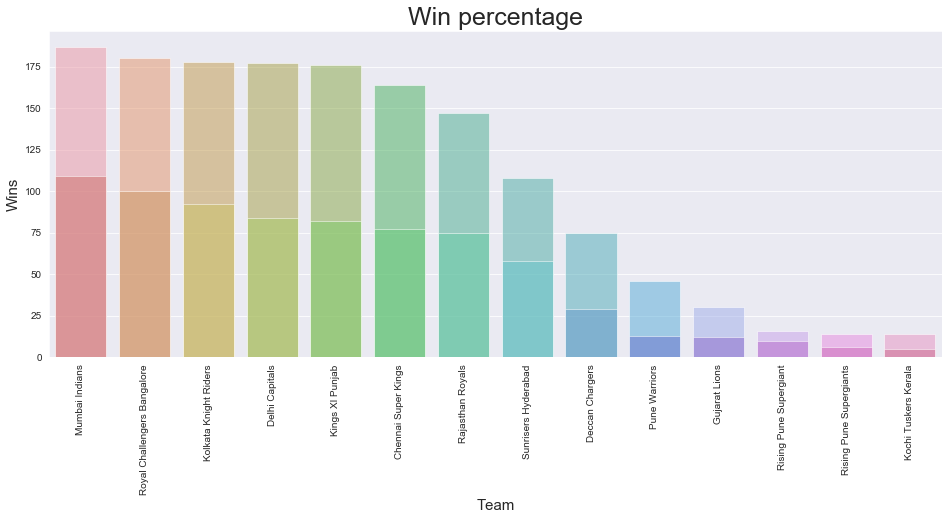

In [1088]:
sns.barplot(x=m.index, y= "Total_matches", data=m, alpha=0.5)
sns.barplot(x=m.index, y= "wins", data= m, alpha=0.5, palette= 'hls')
plt.xticks(rotation=90)
plt.title("Win percentage", size=25)
plt.xlabel("Team", size=15)
plt.ylabel("Wins", size=15)


#### 2.	Total no. of wins by each team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


Text(0, 0.5, 'Wins')

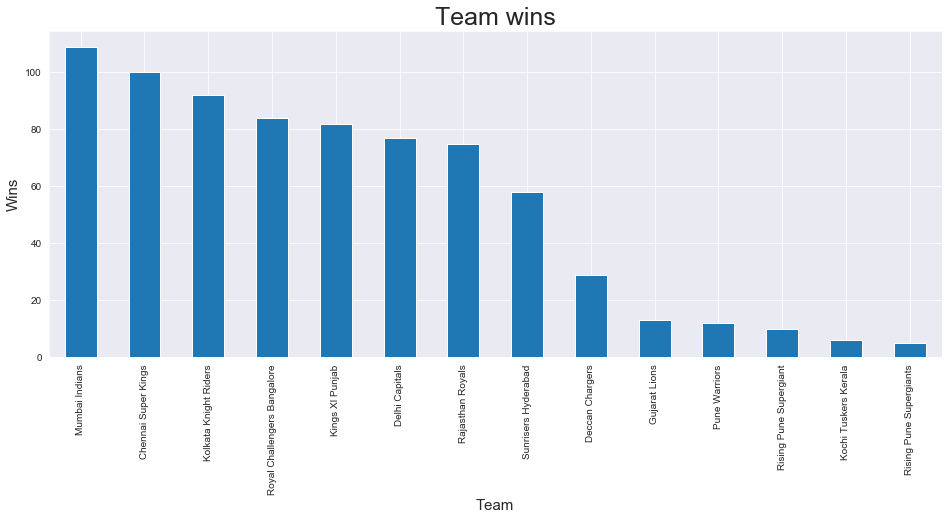

In [1089]:
print(mat["winner"].value_counts())
mat["winner"].value_counts().plot.bar()
plt.title("Team wins", size=25)
plt.xlabel("Team", size=15)
plt.ylabel("Wins", size=15)

Text(0, 0.5, 'Wins')

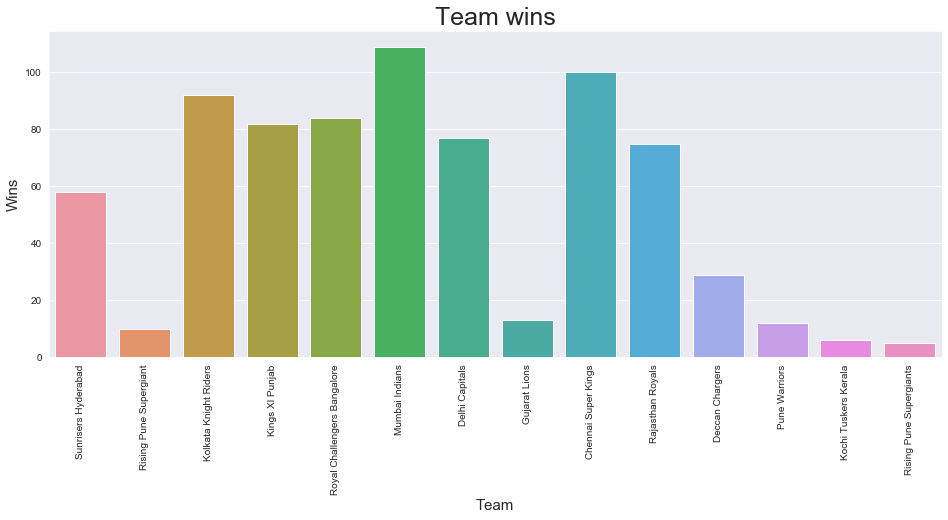

In [1091]:
sns.countplot(x="winner", data=mat)
plt.xticks(rotation=90)
plt.title("Team wins", size=25)
plt.xlabel("Team", size=15)
plt.ylabel("Wins", size=15)

#### 3.	Venue of Most Matches

Text(0, 0.5, 'Count')

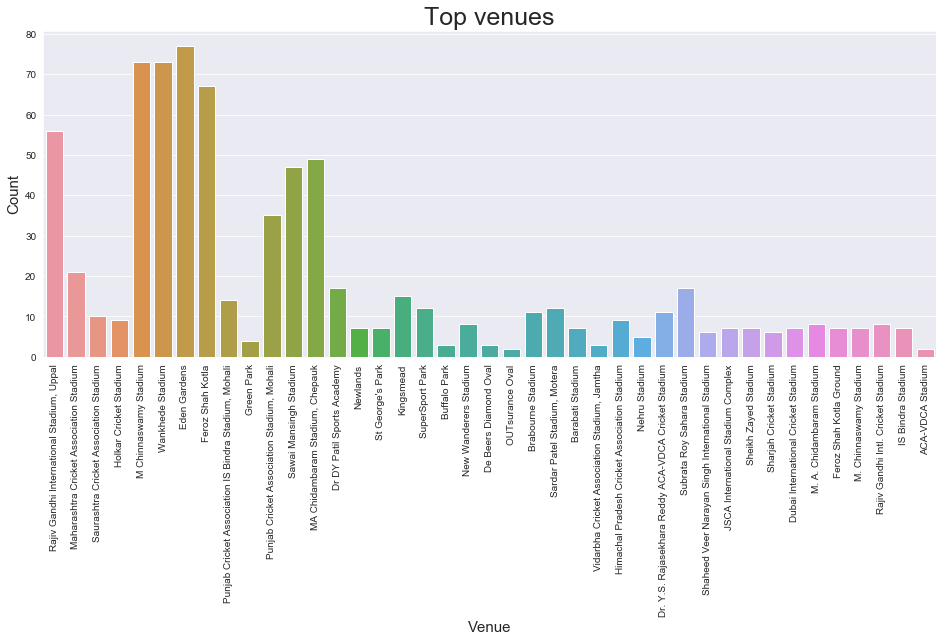

In [1092]:
sns.countplot(x="venue", data=mat)
plt.xticks(rotation=90)
plt.title("Top venues", size=25)
plt.xlabel("Venue", size=15)
plt.ylabel("Count", size=15)

In [54]:
mat["venue"].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

#### 4.	Matches hosted in each city

In [59]:
mat= mat.replace(to_replace= "Bengaluru", value= "Bangalore")

In [60]:
mat["city"].value_counts()

Mumbai            101
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Ranchi              7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

Text(0, 0.5, 'Count')

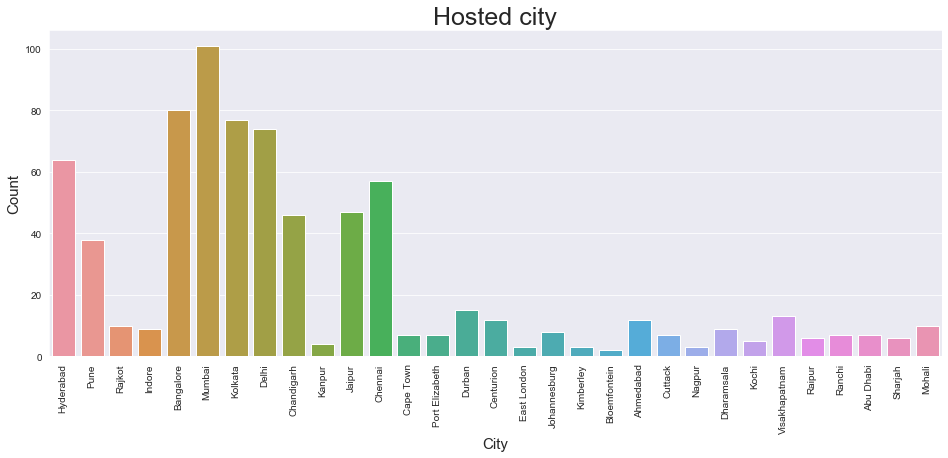

In [1093]:
sns.countplot(x= "city", data=mat)
plt.xticks(rotation=90)
plt.title("Hosted city", size=25)
plt.xlabel("City", size=15)
plt.ylabel("Count", size=15)

#### 5.	Favorite Umpire

Text(0, 0.5, 'Count')

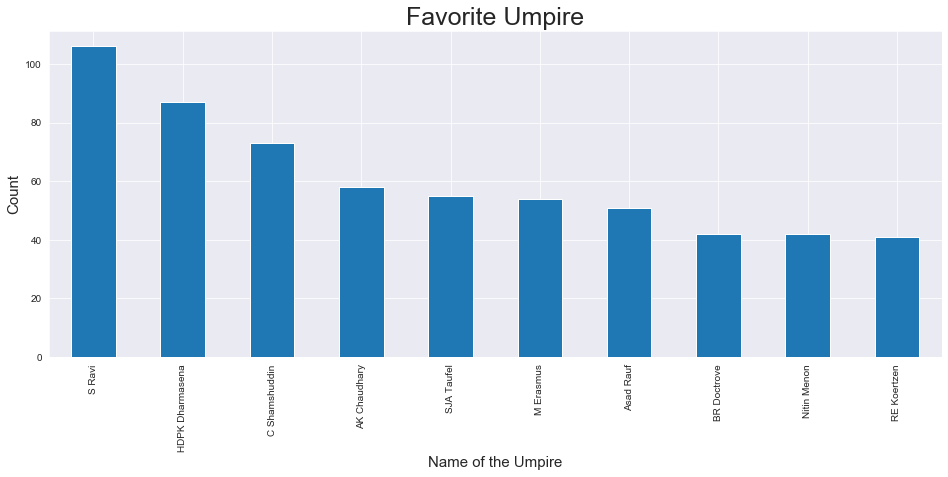

In [1095]:
umpire= pd.concat([mat["umpire1"], mat["umpire2"]])
umpire.value_counts().nlargest(10).plot.bar()
umpire.count()
plt.title("Favorite Umpire", size=25)
plt.xlabel("Name of the Umpire", size=15)
plt.ylabel("Count", size=15)

#### 6.	Runs per Season (average and total runs)

In [72]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [76]:
batsman= mat[["id", "season"]].merge(ball, left_on="id", right_on="match_id", how= "left")
batsman.drop("id", axis=1, inplace=True)
batsman

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [93]:
season= batsman.groupby('season')["total_runs"].sum().reset_index()
season
avg_runs= mat.groupby("season").count().id.reset_index()
avg_runs.rename(columns={"id":"Matches"}, inplace=True)
avg_runs["total_runs"]= season["total_runs"]
avg_runs["average_runs"]= avg_runs["total_runs"]/avg_runs["Matches"]
avg_runs

,season,Matches,total_runs,average_runs
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


Text(0.5, 1.0, 'Average score in every season')

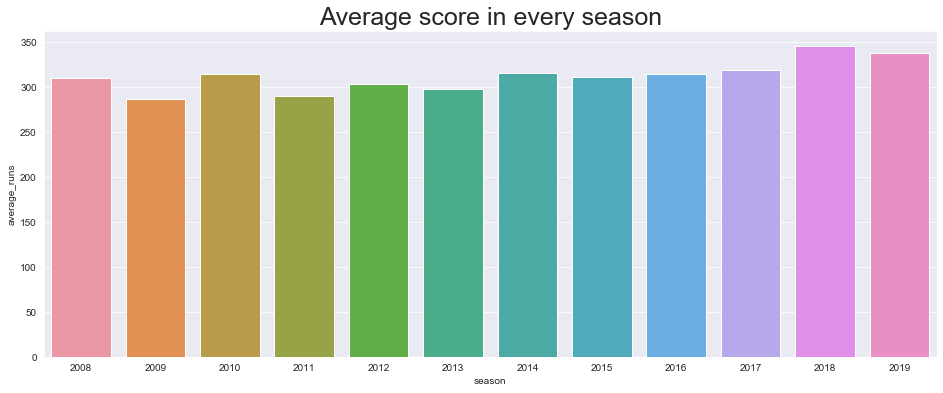

In [121]:
sns.barplot(x="season", y= "average_runs", data= avg_runs)
plt.title("Average score in every season", size=25)


Text(0.5, 1.0, 'Total score in every season')

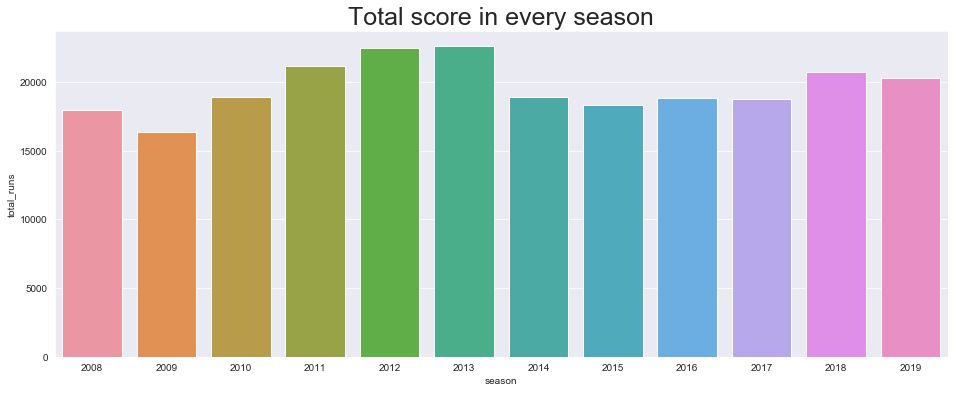

In [122]:
sns.barplot(x="season", y= "total_runs", data= avg_runs)
plt.title("Total score in every season", size=25)


#### 7.	Run Distribution Over Years

In [158]:
six= batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
four= batsman.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
boundries= six.merge(four, left_on="season", right_on="season", how="left")
boundries.rename(columns={"batsman_runs_x": "Sixes", "batsman_runs_y": "Fours"}, inplace=True)
boundries



,season,Sixes,Fours
0,2008,623,1703
1,2009,508,1321
2,2010,587,1709
3,2011,639,1916
4,2012,733,1911
5,2013,681,2054
6,2014,715,1563
7,2015,692,1611
8,2016,639,1633
9,2017,706,1612


In [159]:
# Total score from fours, sizes and others
boundries['Sixes']= boundries["Sixes"]*6
boundries["Fours"]= boundries["Fours"]*4
boundries["total_runs"]= season["total_runs"]
boundries

,season,Sixes,Fours,total_runs
0,2008,3738,6812,17937
1,2009,3048,5284,16353
2,2010,3522,6836,18883
3,2011,3834,7664,21154
4,2012,4398,7644,22453
5,2013,4086,8216,22602
6,2014,4290,6252,18931
7,2015,4152,6444,18353
8,2016,3834,6532,18862
9,2017,4236,6448,18786


No handles with labels found to put in legend.


(0, 30000)

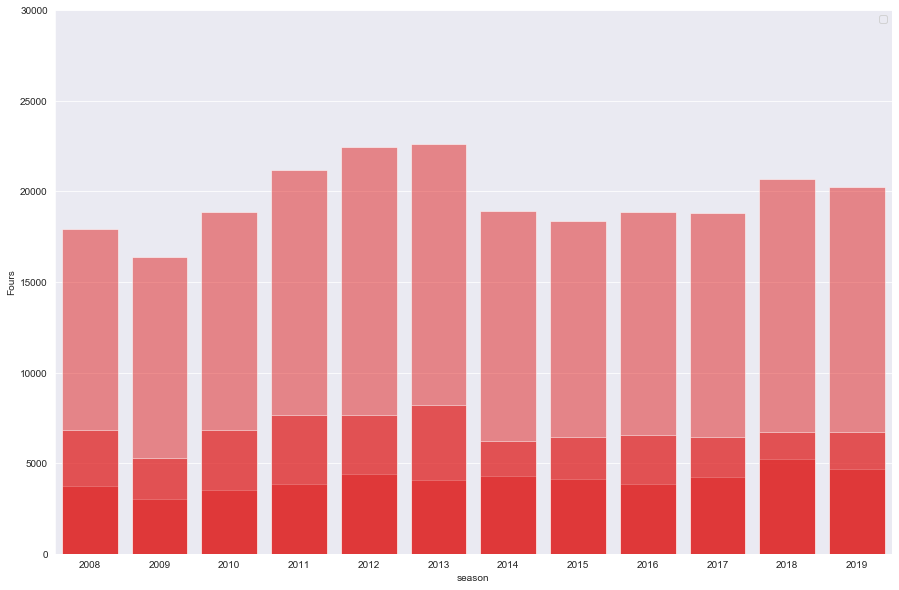

In [175]:
plt.figure(figsize=(15,10))
sns.barplot(x="season", y="total_runs", data= boundries, color="r", alpha=0.5)
sns.barplot(x="season", y="Sixes", data= boundries, color="r", alpha=0.5)
sns.barplot(x="season", y="Fours", data= boundries, color="r", alpha=0.5)
plt.legend()
plt.ylim(0, 30000)

#### 8.	Target of 200 Runs or More

In [177]:
batsman.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [217]:
high_score= batsman.groupby(["match_id", "inning", "batting_team", "bowling_team"])["total_runs"].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172
2,2,1,Mumbai Indians,Rising Pune Supergiant,184
3,2,2,Rising Pune Supergiant,Mumbai Indians,187
4,3,1,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...,...
1523,11413,2,Delhi Capitals,Sunrisers Hyderabad,170
1524,11414,1,Delhi Capitals,Chennai Super Kings,155
1525,11414,2,Chennai Super Kings,Delhi Capitals,162
1526,11415,1,Mumbai Indians,Chennai Super Kings,152


In [218]:
high_score=high_score[high_score["total_runs"]>=200]
high_score.nlargest(10, "total_runs")

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


#### 9.	How many times each Team scored > 200

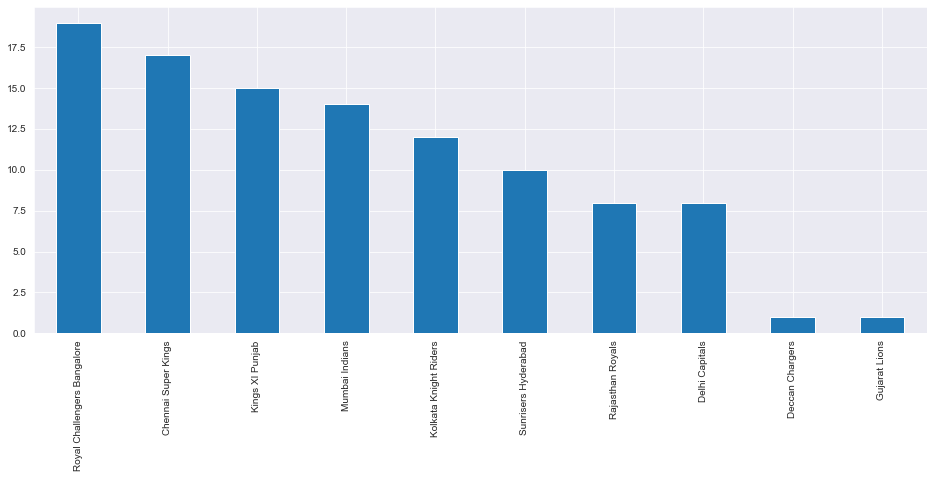

In [219]:
high_score["batting_team"].value_counts().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

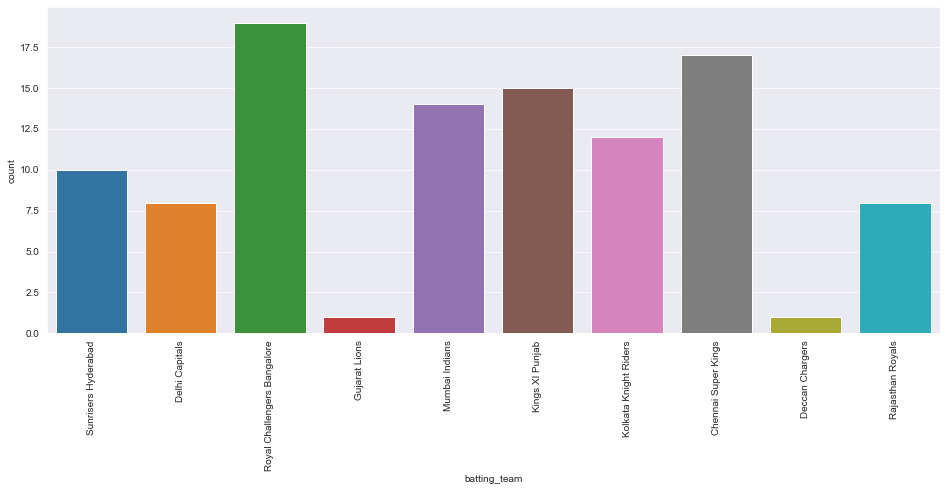

In [220]:
sns.countplot(x="batting_team", data=high_score)
plt.xticks(rotation=90)

In [221]:
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Capitals,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209
...,...,...,...,...,...
1475,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
1488,11333,1,Royal Challengers Bangalore,Kings XI Punjab,213
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
1499,11338,2,Mumbai Indians,Kolkata Knight Riders,204


In [222]:
high_score.groupby(["inning", "batting_team"]).count().reset_index()
high_score.drop(["bowling_team", "total_runs"], axis=1, inplace=True)
high_score.rename(columns={"match_id":"Total_times"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [216]:
high_score.tail()

,Total_times,inning,batting_team
1475,11326,2,Kolkata Knight Riders
1488,11333,1,Royal Challengers Bangalore
1498,11338,1,Kolkata Knight Riders
1499,11338,2,Mumbai Indians
1500,11339,1,Sunrisers Hyderabad


In [225]:
hs_1= high_score[high_score["inning"]==1]
hs_2= high_score[high_score["inning"]==2]
hs_1

,Total_times,inning,batting_team
0,1,1,Sunrisers Hyderabad
16,9,1,Delhi Capitals
38,20,1,Royal Challengers Bangalore
62,32,1,Sunrisers Hyderabad
72,36,1,Sunrisers Hyderabad
...,...,...,...
1452,11315,1,Kings XI Punjab
1474,11326,1,Royal Challengers Bangalore
1488,11333,1,Royal Challengers Bangalore
1498,11338,1,Kolkata Knight Riders


Text(0.5, 1.0, 'First innings')

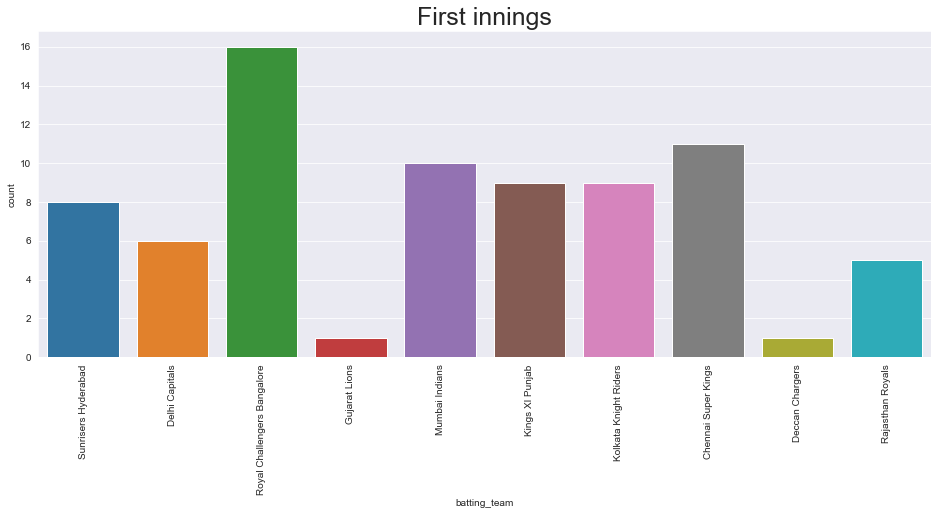

In [242]:

sns.countplot(x= "batting_team", data=hs_1)
plt.xticks(rotation=90)
plt.title("First innings", size=25)

Text(0.5, 1.0, 'Second innings')

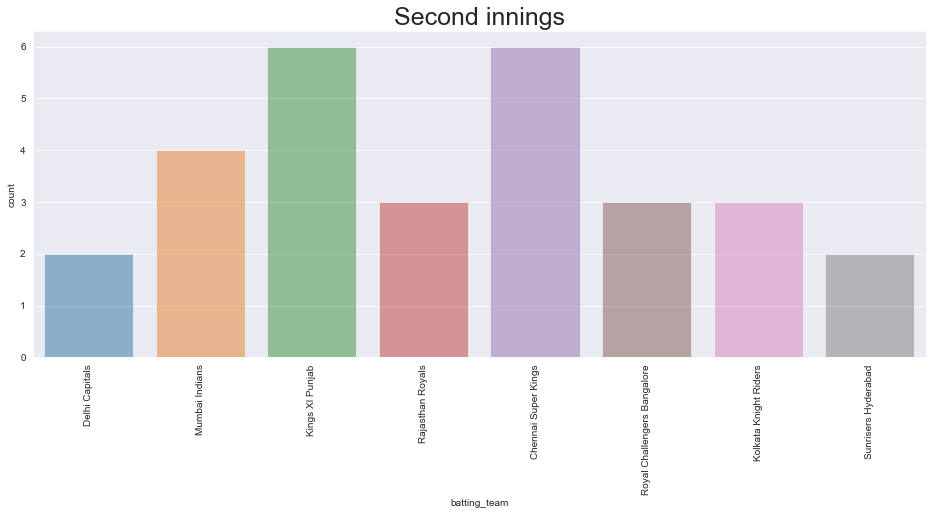

In [243]:
sns.countplot(x= "batting_team", data=hs_2, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Second innings", size=25)

#### 10.	Is it possible to chase >200 Target

In [275]:
high_score= batsman.groupby(["match_id", "inning", "batting_team", "bowling_team"])["total_runs"].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172
2,2,1,Mumbai Indians,Rising Pune Supergiant,184
3,2,2,Rising Pune Supergiant,Mumbai Indians,187
4,3,1,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...,...
1523,11413,2,Delhi Capitals,Sunrisers Hyderabad,170
1524,11414,1,Delhi Capitals,Chennai Super Kings,155
1525,11414,2,Chennai Super Kings,Delhi Capitals,162
1526,11415,1,Mumbai Indians,Chennai Super Kings,152


In [277]:
hs_1= high_score[high_score["inning"]==1]
hs_2= high_score[high_score["inning"]==2]
hs= hs_1.merge(hs_2[["match_id", "inning", "total_runs"]], on="match_id")
hs.rename(columns={"inning_x": "inning_1", "total_runs_x": "total_runs_1", "inning_y": "inning_2", "total_runs_y": "total_runs_2"}, inplace=True)
hs= hs[hs["total_runs_1"]>=200]
hs["is_score_chased"]=1
hs["is_score_chased"]= np.where(hs["total_runs_1"]<=hs["total_runs_2"], "yes", "no")
hs

,match_id,inning_1,batting_team,bowling_team,total_runs_1,inning_2,total_runs_2,is_score_chased
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,2,172,no
8,9,1,Delhi Capitals,Rising Pune Supergiant,205,2,108,no
19,20,1,Royal Challengers Bangalore,Gujarat Lions,213,2,192,no
31,32,1,Sunrisers Hyderabad,Kings XI Punjab,207,2,181,no
35,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209,2,161,no
...,...,...,...,...,...,...,...,...
717,11315,1,Kings XI Punjab,Mumbai Indians,204,2,210,yes
728,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,219,2,219,yes
735,11333,1,Royal Challengers Bangalore,Kings XI Punjab,213,2,190,no
740,11338,1,Kolkata Knight Riders,Mumbai Indians,241,2,204,no


In [278]:
hs["is_score_chased"].value_counts()

no     62
yes    13
Name: is_score_chased, dtype: int64

([<matplotlib.patches.Wedge at 0x207e812f4c8>,
 [Text(-0.9409006619906302, 0.5698297502461538, 'No'),
  Text(0.9409006353149731, -0.5698297942928925, 'Yes')],
 [Text(-0.5132185429039801, 0.31081622740699294, '82.7%'),
  Text(0.5132185283536217, -0.3108162514324868, '17.3%')])

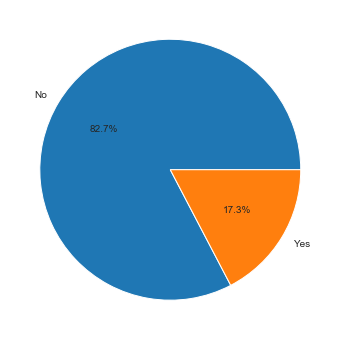

In [282]:
labels= ["No", "Yes"]
size=["62", "13"]
plt.pie(size, labels=labels, autopct='%1.1f%%')

**ooh! its hard to achieve this target only 17 out 100 target > 200 chased successfully**

### 11.	Average Score of Each Team Per Season (incomplte)

In [318]:
total= mat[["id", "season", "winner", "toss_decision", "toss_winner", "team1"]].merge(ball, left_on= "id", right_on="match_id", how="left").drop('id', axis=1)
total.head()

,season,winner,toss_decision,toss_winner,team1,match_id,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [335]:
avg_score= total.pivot_table(index=["season"], columns= "batting_team", values= "total_runs", aggfunc= sum)
avg_score

no_matchs= mat.groupby(["season", "team1"]).count().id.reset_index()
no_matchs

,season,team1,id
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,8
2,2008,Delhi Capitals,6
3,2008,Kings XI Punjab,7
4,2008,Kolkata Knight Riders,9
...,...,...,...
95,2019,Kolkata Knight Riders,9
96,2019,Mumbai Indians,10
97,2019,Rajasthan Royals,5
98,2019,Royal Challengers Bangalore,9


In [329]:
total_win= mat.groupby(["season", "winner"]).count()[["id"]].reset_index()
total_win


,season,winner,id
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Capitals,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
95,2019,Kolkata Knight Riders,6
96,2019,Mumbai Indians,11
97,2019,Rajasthan Royals,5
98,2019,Royal Challengers Bangalore,5


### 12.	Runs Per over of Each Team

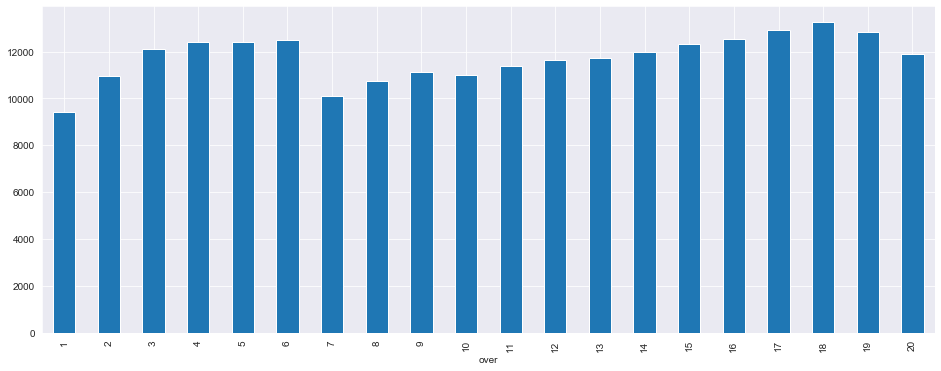

In [376]:
total= total.replace(to_replace="Rising Pune Supergiants", value="Rising Pune Supergiant")
total= total.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")


# Overall score for each over across each seson
total.groupby("over")["total_runs"].sum().plot.bar()

In [377]:
run_per_over= total.pivot_table(index=["over"], columns= "batting_team", values= "total_runs", aggfunc=sum)
run_per_over

batting_team,Chennai Super Kings,Delhi Capitals,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,
1,870,1116,209,1102,103,1256,1088,264,923,163,1139,1173
2,1116,1406,226,1254,96,1358,1253,301,1001,200,1257,1494
3,1293,1429,294,1427,115,1424,1449,357,1142,250,1449,1489
4,1354,1455,269,1505,126,1473,1539,329,1238,246,1445,1428
5,1423,1489,267,1469,97,1463,1556,316,1121,262,1434,1529
6,1447,1341,294,1539,143,1396,1613,328,1180,302,1387,1542
7,1159,1252,259,1243,89,1207,1162,246,978,198,1120,1170
8,1186,1234,249,1345,86,1207,1291,317,1031,201,1328,1262
9,1246,1313,242,1372,88,1240,1371,296,1093,203,1344,1319


(0, 25)

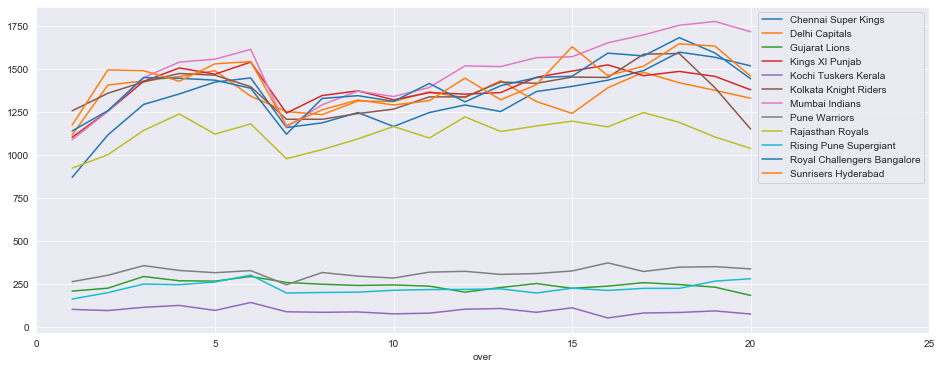

In [378]:
run_per_over.plot()
plt.legend()
plt.xlim(0,25)

- Powerplay is upto six overs so there is dip in 7th over
- MI is best at Death over (Good Finishers/Tailenders)
- RR is worst among all in death, middle and powerplay overs

#### 13.	Top 20 players with most MOM awards

In [380]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


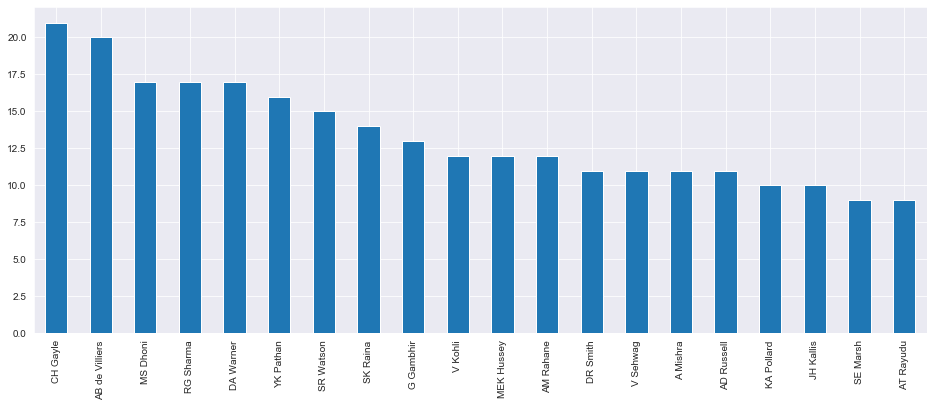

In [382]:
mat["player_of_match"].value_counts().nlargest(20).plot.bar()

#### 14.	Season wise match summary of matches won by runs

In [419]:
mat.groupby(["season"])["win_by_runs"].max()

season
2008    140
2009     92
2010     98
2011    111
2012     86
2013    130
2014     93
2015    138
2016    144
2017    146
2018    102
2019    118
Name: win_by_runs, dtype: int64

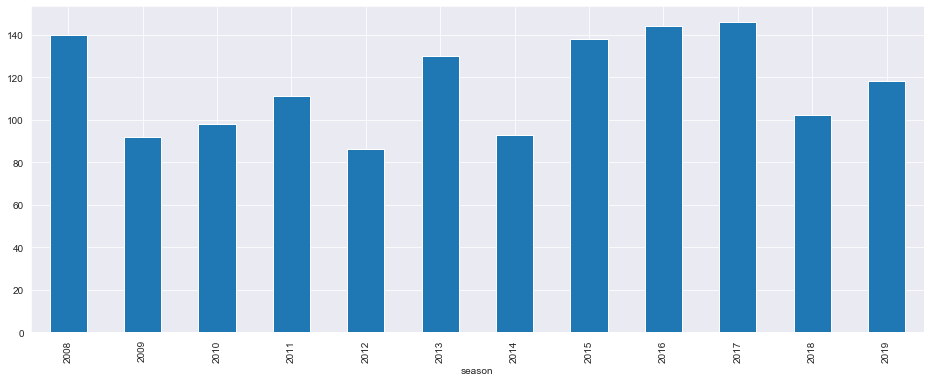

In [411]:
mat.groupby(["season"])["win_by_runs"].max().plot.bar()

### 15.	Season wise match summary of matches won by wickets

In [423]:
mat.groupby(["season"])["win_by_wickets"].max()

season
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014     9
2015    10
2016    10
2017    10
2018    10
2019     9
Name: win_by_wickets, dtype: int64

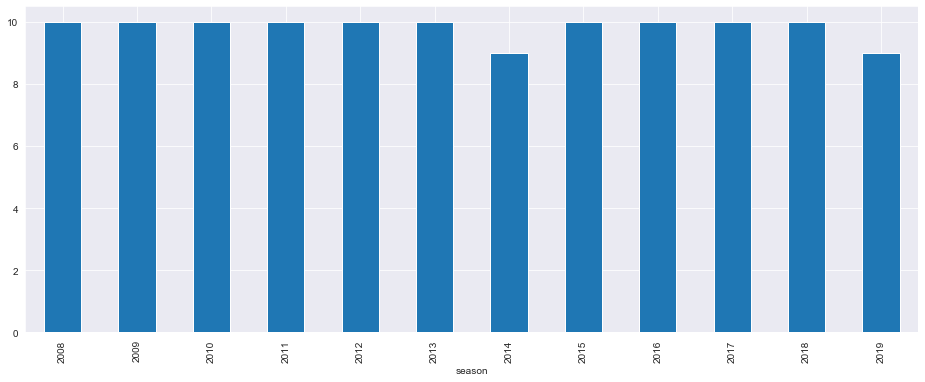

In [424]:
mat.groupby(["season"])["win_by_wickets"].max().plot.bar()

In [425]:
# Biggest chasing winn
mat.iloc[mat["win_by_wickets"].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

### 16.	Most successful IPL team

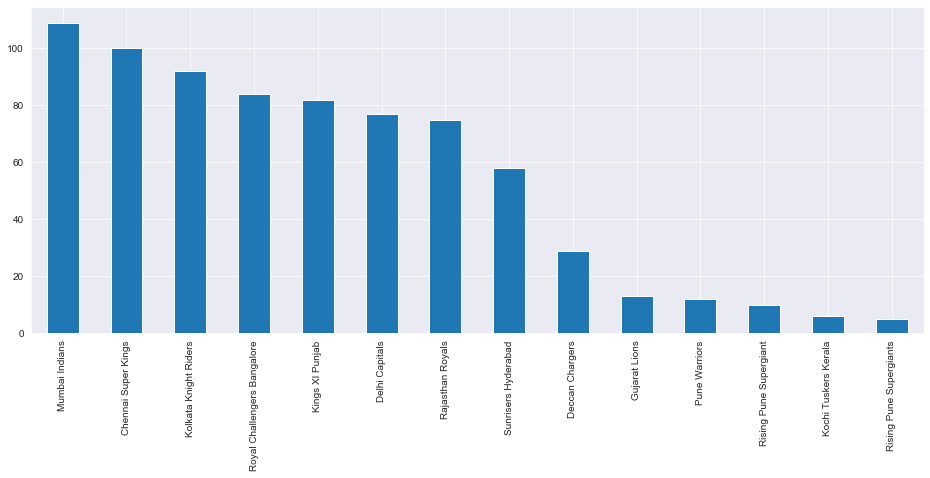

In [427]:
mat["winner"].value_counts().plot.bar()

**Mumbai Indians are the successful IPL team**

## PowerPlay Analysis

### 1.	Runs in Powerplay of Each Match

In [431]:
total.head()

,season,winner,toss_decision,toss_winner,team1,match_id,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [429]:
ball["total_runs"].unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [443]:
powerply=total[(total["over"]>=1) & (total["over"]<7)]
powerply.head()

,season,winner,toss_decision,toss_winner,team1,match_id,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [447]:
innin1= powerply[powerply["inning"]==1].groupby("match_id")["total_runs"].sum().reset_index()
innin1.rename(columns= {"total_runs":"inning1"})
innin2= powerply[powerply["inning"]==2].groupby("match_id")["total_runs"].sum().reset_index()
innin2.rename(columns= {"total_runs":"inning2"})

,match_id,inning2
0,1,54
1,2,59
2,3,73
3,4,56
4,5,43
...,...,...
749,11347,48
750,11412,47
751,11413,56
752,11414,42


In [475]:
inning= innin1.merge(innin2, left_on= "match_id", right_on="match_id", how="left")
inning.rename(columns={"total_runs_x":"Inning1", "total_runs_y": "inning2"}, inplace=True)
inning.drop("match_id", axis=1, inplace=True)
inning

,Inning1,inning2
0,59,54.0
1,61,59.0
2,52,73.0
3,35,56.0
4,41,43.0
...,...,...
751,51,48.0
752,33,47.0
753,54,56.0
754,42,42.0


Text(0, 0.5, 'Score')

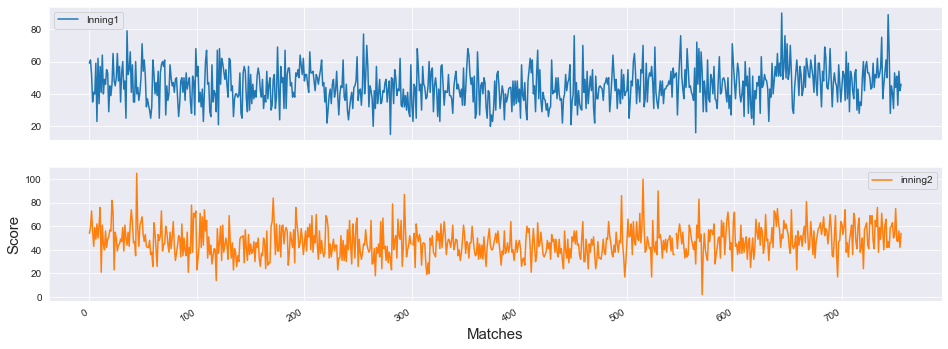

In [628]:
inning.plot(subplots=True)
plt.xlabel("Matches", size=15)
plt.ylabel("Score", size=15)


### 2.	Powerplay Average Runs per season

In [481]:
innin3= powerply[powerply["inning"]==1].groupby("season")["total_runs"].sum().reset_index()
innin3.rename(columns= {"total_runs":"inning1"})
innin4= powerply[powerply["inning"]==2].groupby("season")["total_runs"].sum().reset_index()
innin4.rename(columns= {"total_runs":"inning2"})


,season,inning2
0,2008,2755
1,2009,2423
2,2010,2862
3,2011,3207
4,2012,3250
5,2013,3204
6,2014,2767
7,2015,2633
8,2016,2906
9,2017,3105


In [504]:
inning_season= innin3.merge(innin4, left_on= "season", right_on="season", how="left")
inning_season.rename(columns={"total_runs_x":"Inning1", "total_runs_y": "inning2"}, inplace=True)
inning_season.set_index("season", inplace=True)
inning_season

,Inning1,inning2
season,,
2008,2603,2755
2009,2510,2423
2010,2820,2862
2011,3057,3207
2012,3162,3250
2013,3118,3204
2014,2658,2767
2015,2774,2633
2016,2632,2906


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

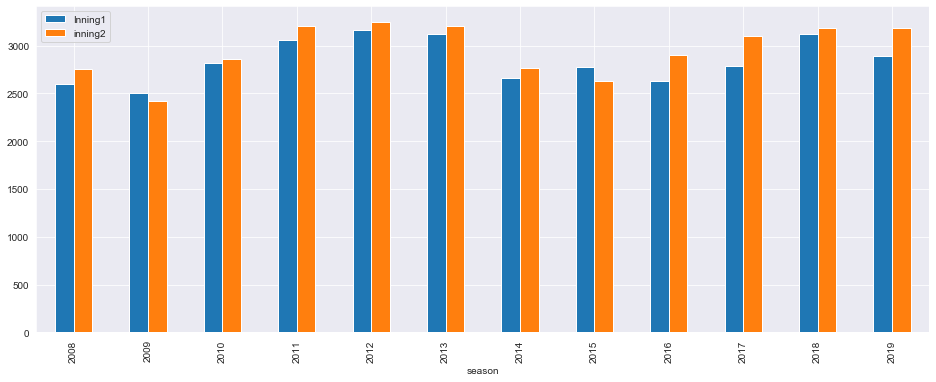

In [512]:
inning_season.plot.bar()
plt.xticks()

**This plot is for the total runs in powerply for each seaon**

In [551]:
innin5= powerply[powerply["inning"]==1].groupby(["season", "match_id"])["total_runs"].agg(["sum"])
innin5.rename(columns= {"total_runs":"inning1"})
innin5= innin5.reset_index().groupby("season")["sum"].mean()
innin5

season
2008    44.879310
2009    44.035088
2010    47.000000
2011    41.876712
2012    42.729730
2013    41.026316
2014    44.300000
2015    47.016949
2016    43.866667
2017    47.288136
2018    52.100000
2019    48.250000
Name: sum, dtype: float64

In [538]:
innin6= powerply[powerply["inning"]==2].groupby(["season", "match_id"])["total_runs"].agg(["sum"])
innin6= innin6.groupby("season")["sum"].mean()
innin6

season
2008    47.500000
2009    42.508772
2010    47.700000
2011    44.541667
2012    43.918919
2013    42.157895
2014    46.116667
2015    45.396552
2016    48.433333
2017    52.627119
2018    53.133333
2019    53.000000
Name: sum, dtype: float64

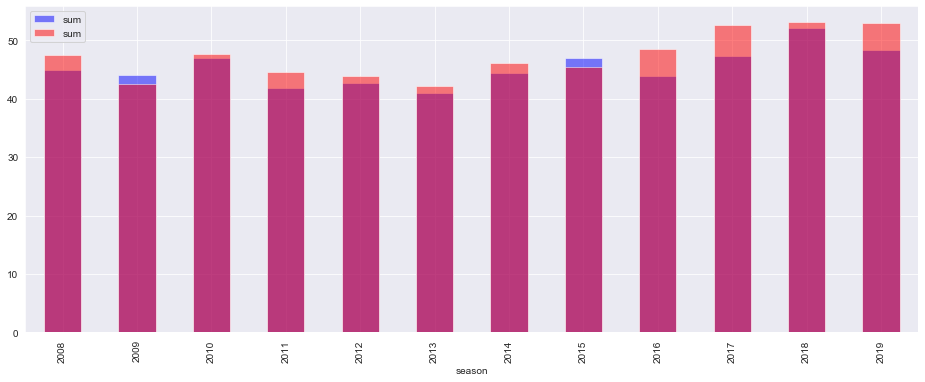

In [554]:
innin5.plot.bar(color="B", alpha=0.5)
innin6.plot.bar(color="R", alpha=0.5)
plt.legend()

### 3.	Powerplay Average Dismissals

In [559]:
powerply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56566 entries, 0 to 178990
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   season            56566 non-null  int64 
 1   winner            56395 non-null  object
 2   toss_decision     56566 non-null  object
 3   toss_winner       56566 non-null  object
 4   team1             56566 non-null  object
 5   match_id          56566 non-null  int64 
 6   inning            56566 non-null  int64 
 7   batting_team      56566 non-null  object
 8   bowling_team      56566 non-null  object
 9   over              56566 non-null  int64 
 10  ball              56566 non-null  int64 
 11  batsman           56566 non-null  object
 12  non_striker       56566 non-null  object
 13  bowler            56566 non-null  object
 14  is_super_over     56566 non-null  int64 
 15  wide_runs         56566 non-null  int64 
 16  bye_runs          56566 non-null  int64 
 17  legbye_runs

In [557]:
powerply.player_dismissed.value_counts()

PA Patel             73
G Gambhir            69
S Dhawan             66
CH Gayle             61
V Sehwag             61
                     ..
T Kohli               1
Sohail Tanvir         1
R Bishnoi             1
Mohammad Ashraful     1
WD Parnell            1
Name: player_dismissed, Length: 228, dtype: int64

Text(0.5, 1.0, 'No. of times Batsman dismissed in all seasons')

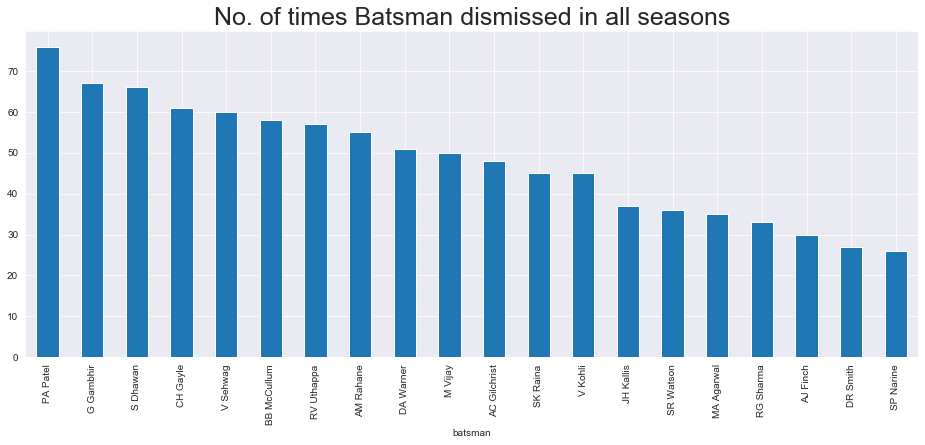

In [573]:
powerply.groupby(["batsman"])["player_dismissed"].count().nlargest(20).plot.bar()
plt.title("No. of times Batsman dismissed in all seasons", size=25)


Text(0.5, 1.0, 'total dismissal in each seasons')

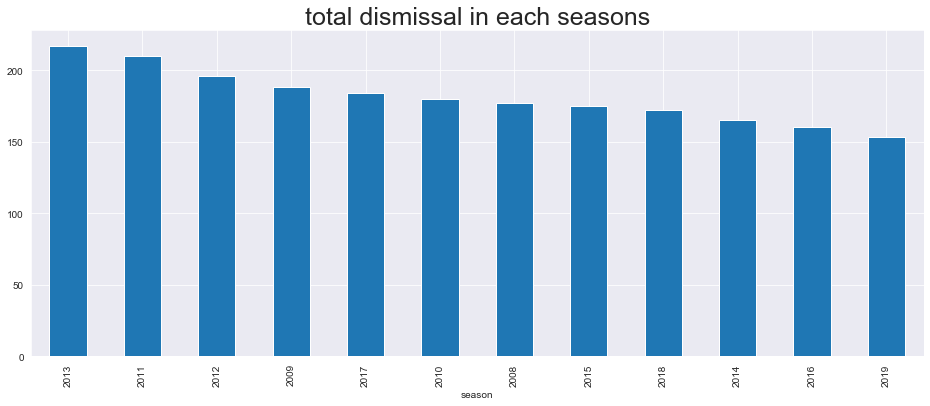

In [577]:
powerply.groupby(["season"])["player_dismissed"].count().nlargest(20).plot.bar()
plt.title("total dismissal in each seasons", size=25)


## Batsman Data

In [578]:
batsman

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,2019,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [588]:
strike_rate= batsman.groupby(["batsman"]).agg({"ball":"count", "batsman_runs":"mean"}).sort_values(by="batsman_runs", ascending=False)
strike_rate.rename(columns= {"batsman_runs": "Strike_rate"}, inplace=True)
strike_rate

,ball,Strike_rate
batsman,,
B Stanlake,2,2.500000
Umar Gul,19,2.052632
RS Sodhi,2,2.000000
S Sharma,4,2.000000
AD Russell,803,1.799502
...,...,...
L Ablish,2,0.000000
Abdur Razzak,2,0.000000
V Pratap Singh,1,0.000000


In [598]:
runs_per_match= batsman.groupby(["batsman", "match_id"]).agg({"batsman_runs":"sum"})
total_runs= runs_per_match.groupby("batsman").agg({"sum", "count", "mean"})
total_runs.rename(columns={"sum":"batsman score", "count":"match count", "mean":"average score"}, inplace=True)
total_runs.columns= total_runs.columns.droplevel()    # remove extra column name
total_runs

,batsman score,match count,average score
batsman,,,
A Ashish Reddy,280,23,12.173913
A Chandila,4,2,2.000000
A Chopra,53,6,8.833333
A Choudhary,25,3,8.333333
A Dananjaya,4,1,4.000000
...,...,...,...
YV Takawale,192,10,19.200000
Yashpal Singh,47,4,11.750000
Younis Khan,3,1,3.000000


In [600]:
sixes= batsman[["batsman", 'batsman_runs']][batsman["batsman_runs"]==6].groupby("batsman").agg({"batsman_runs":"count"})
sixes
fours= batsman[["batsman", 'batsman_runs']][batsman["batsman_runs"]==4].groupby("batsman").agg({"batsman_runs":"count"})
fours

,batsman_runs
batsman,
A Ashish Reddy,16
A Chopra,7
A Choudhary,1
A Flintoff,5
A Hales,13
...,...
YK Pathan,264
YV Takawale,26
Yashpal Singh,5


In [618]:
batsman_stats= pd.merge(pd.merge(pd.merge(strike_rate, total_runs, left_index=True, right_index=True), sixes, left_index=True, right_index=True), fours, left_index=True, right_index=True)
batsman_stats.rename(columns={'ball' : 'ball', 'Strike_rate':'strike_rate','batsman score' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'}, inplace=True)
batsman_stats["strike_rate"]=batsman_stats["strike_rate"]*100
batsman_stats.sort_values(by="batsman_run", ascending= False, inplace=True)
batsman_stats

,ball,strike_rate,batsman_run,match_count,average_score,six,four
batsman,,,,,,,
V Kohli,4211,129.042983,5434,169,32.153846,191,482
SK Raina,4044,133.902077,5415,189,28.650794,195,495
RG Sharma,3816,128.773585,4914,182,27.000000,194,431
DA Warner,3398,139.523249,4741,126,37.626984,181,459
S Dhawan,3776,122.669492,4632,158,29.316456,96,526
...,...,...,...,...,...,...,...
BJ Haddin,11,163.636364,18,1,18.000000,1,2
JJ van der Wath,17,105.882353,18,3,6.000000,1,1
S Singh,18,94.444444,17,1,17.000000,1,1


### 4.	Highest Average and Strike rate for >50 Matches

In [622]:
fifty= batsman_stats[batsman_stats["match_count"]>50]
fifty.sort_values(by="average_score", ascending=False, inplace=True)
fifty

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ball,strike_rate,batsman_run,match_count,average_score,six,four
batsman,,,,,,,
DA Warner,3398,139.523249,4741,126,37.626984,181,459
CH Gayle,3131,145.640370,4560,124,36.774194,327,376
SE Marsh,1913,130.109775,2489,69,36.072464,78,269
KL Rahul,1465,137.406143,2013,58,34.706897,81,178
MEK Hussey,1648,119.963592,1977,58,34.086207,52,198
...,...,...,...,...,...,...,...
AR Patel,655,123.053435,806,62,13.000000,35,47
Harbhajan Singh,632,131.962025,834,86,9.697674,42,79
PP Chawla,541,108.502773,587,75,7.826667,18,54


Text(0.5, 1.0, 'Best average batsman')

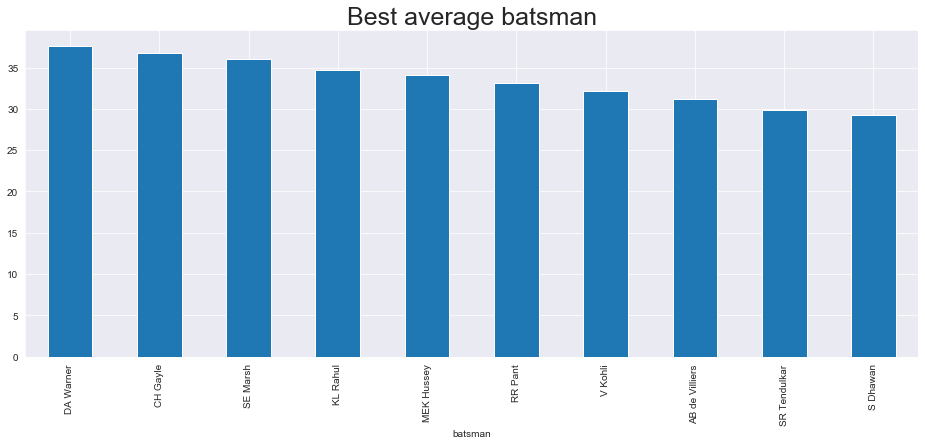

In [631]:
# best average
fifty["average_score"].nlargest(10).plot.bar()
plt.title("Best average batsman", size=25)

**David Warner has highest average followed by Gayle**

Text(0.5, 1.0, 'Best strike rate batsman')

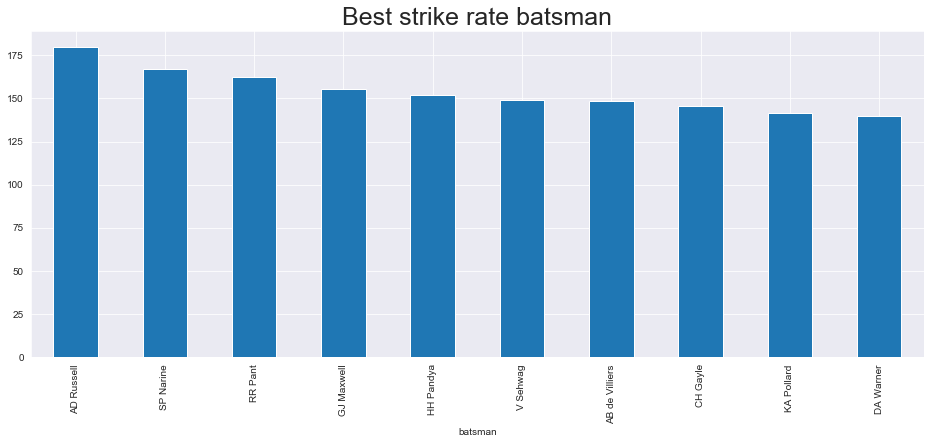

In [632]:
# best strike_rate
fifty["strike_rate"].nlargest(10).plot.bar()
plt.title("Best strike rate batsman", size=25)

**Russell has highest strike rate followed by Narine which is surprising**

### 5.	Top 20 Batsman 

In [658]:
batsman_stats1= batsman_stats.reset_index()
batsman_stats1
AA= batsman_stats1.head(20)
AA

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four
0,V Kohli,4211,129.042983,5434,169,32.153846,191,482
1,SK Raina,4044,133.902077,5415,189,28.650794,195,495
2,RG Sharma,3816,128.773585,4914,182,27.000000,194,431
3,DA Warner,3398,139.523249,4741,126,37.626984,181,459
4,S Dhawan,3776,122.669492,4632,158,29.316456,96,526
5,CH Gayle,3131,145.640370,4560,124,36.774194,327,376
6,MS Dhoni,3318,134.930681,4477,170,26.335294,207,297
7,RV Uthappa,3492,127.319588,4446,170,26.152941,156,436
8,AB de Villiers,2977,148.740343,4428,142,31.183099,214,357
9,G Gambhir,3524,119.835414,4223,151,27.966887,59,492


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

<Figure size 1440x432 with 0 Axes>

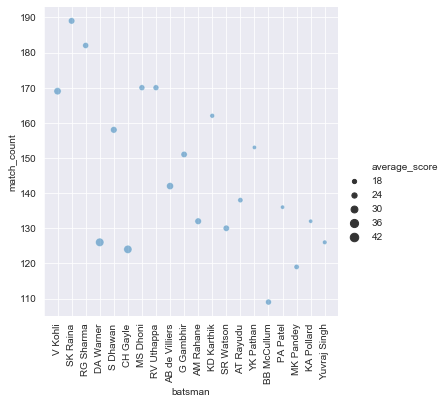

In [665]:
plt.figure(figsize=(20,6))
sns.relplot(x="batsman", y="match_count", size="average_score", alpha=.5, palette="muted", data=AA)
plt.xticks(rotation=90)

- Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot
- Average Score and 6"s by Parthiv Patel is lowest among top 20 batsmen
- Gayle is at top in 6"s

### 6.	Top 10 Batsman in each run category

In [740]:
topper= total.groupby(["batsman", "batsman_runs"])["total_runs"].count().reset_index()
topper=topper.pivot("batsman", "batsman_runs", "total_runs")
topper=pd.DataFrame(topper)
topper= topper.fillna(0)
topper.columns= ["dots", "singles", "doubbles", "threes", "fours", "No_fours", "six", "No_sixes"]
topper

,dots,singles,doubbles,threes,fours,No_fours,six,No_sixes
batsman,,,,,,,,
A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,0.0,15.0,0.0
A Chandila,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
A Chopra,45.0,21.0,2.0,0.0,7.0,0.0,0.0,0.0
A Choudhary,4.0,13.0,1.0,0.0,1.0,0.0,1.0,0.0
A Dananjaya,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
YV Takawale,100.0,41.0,12.0,0.0,26.0,1.0,3.0,0.0
Yashpal Singh,39.0,20.0,2.0,1.0,5.0,0.0,0.0,0.0
Younis Khan,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [741]:
topper=topper.astype("int")
topper

,dots,singles,doubbles,threes,fours,No_fours,six,No_sixes
batsman,,,,,,,,
A Ashish Reddy,61,83,20,1,16,0,15,0
A Chandila,3,4,0,0,0,0,0,0
A Chopra,45,21,2,0,7,0,0,0
A Choudhary,4,13,1,0,1,0,1,0
A Dananjaya,2,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
YV Takawale,100,41,12,0,26,1,3,0
Yashpal Singh,39,20,2,1,5,0,0,0
Younis Khan,4,3,0,0,0,0,0,0


In [744]:
six= topper.sort_values("six", ascending=False).head(10)
four= topper.sort_values("fours", ascending=False).head(10)
twos= topper.sort_values("doubbles", ascending=False).head(10)
singles= topper.sort_values("singles", ascending=False).head(10)
dots= topper.sort_values("dots", ascending=False).head(10)

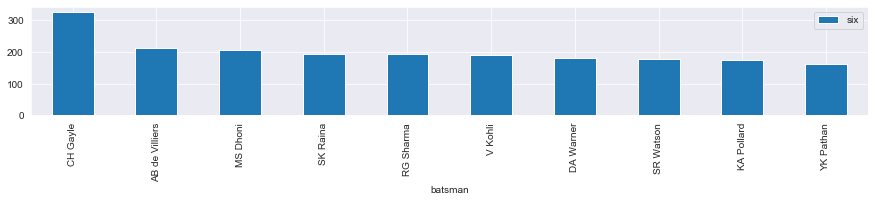

In [818]:
plt.figure(figsize=(15,2))
six["six"].plot.bar()
plt.legend();

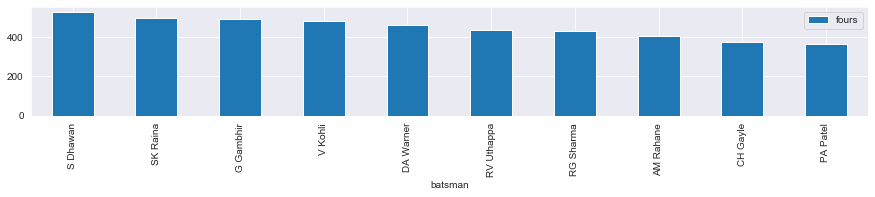

In [817]:
plt.figure(figsize=(15,2))
four["fours"].plot.bar()
plt.legend();

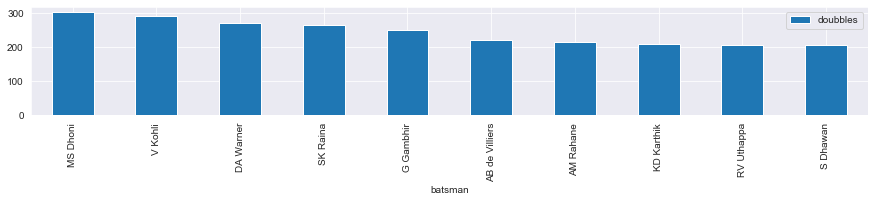

In [819]:
plt.figure(figsize=(15,2))
twos["doubbles"].plot.bar()
plt.legend();

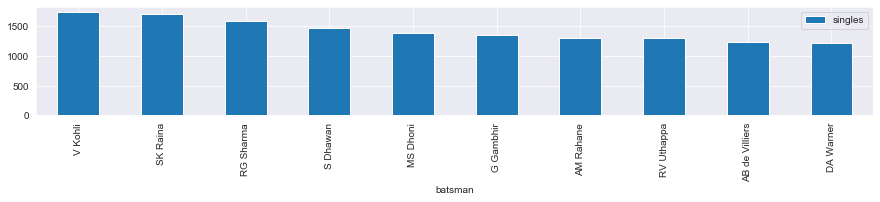

In [820]:
plt.figure(figsize=(15,2))
singles["singles"].plot.bar()
plt.legend();

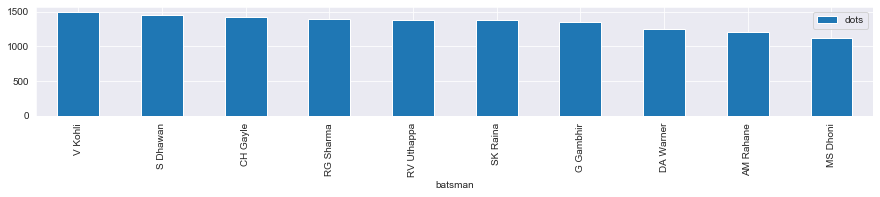

In [821]:
plt.figure(figsize=(15,2))
dots["dots"].plot.bar()
plt.legend();

### 7.	Orange Cap Holders

In [788]:
orange= total.groupby(["season", "batsman"])["batsman_runs"].sum().reset_index()
orange=orange.sort_values("batsman_runs", ascending=0)
orange= orange.drop_duplicates(subset=["season"], keep="first")
orange.sort_values("season", ascending=False)

,season,batsman,batsman_runs
1696,2019,DA Warner,727
1595,2018,KS Williamson,747
1422,2017,DA Warner,641
1383,2016,V Kohli,973
1148,2015,DA Warner,562
1088,2014,RV Uthappa,660
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
502,2011,CH Gayle,608
446,2010,SR Tendulkar,618


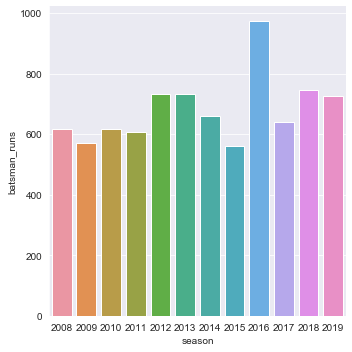

In [797]:
sns.catplot(x= "season", y= "batsman_runs", data=orange, kind="bar")

**Virat kohli owned Orange cap with highesr 973 runs in 2016**


### 8.	Centuries and half centuries analysis

In [882]:
century= total.groupby(["match_id", "season", "batsman"])["batsman_runs"].sum().reset_index()
century= century.sort_values("batsman_runs", ascending=0)
century1= century[century['batsman_runs']>= 100]
half= century[(century['batsman_runs']>= 50) & (century['batsman_runs']< 100)]
half

,match_id,season,batsman,batsman_runs
10257,7943,2018,KL Rahul,99
6547,435,2013,SK Raina,99
6591,438,2013,V Kohli,99
4679,311,2012,AM Rahane,98
11008,11332,2019,SR Watson,98
...,...,...,...,...
1632,108,2008,RG Sharma,50
3812,252,2011,SK Raina,50
8718,582,2016,AJ Finch,50
9315,624,2016,MK Pandey,50


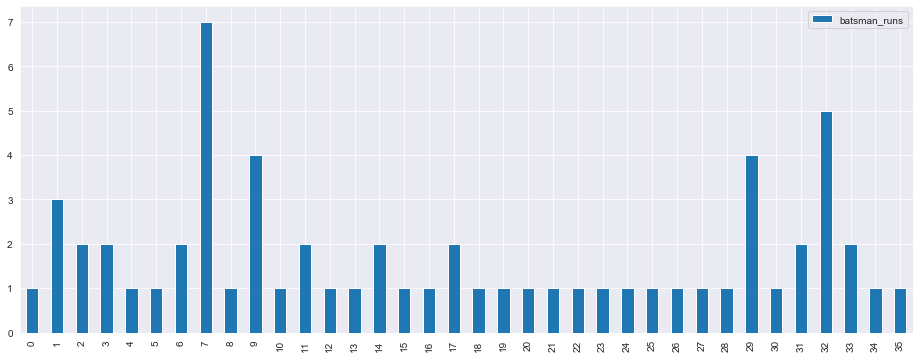

In [903]:
century1.sort_values("season", ascending=False)
cen= century1.groupby(["batsman"])["batsman_runs"].count().reset_index()
cen.plot.bar()

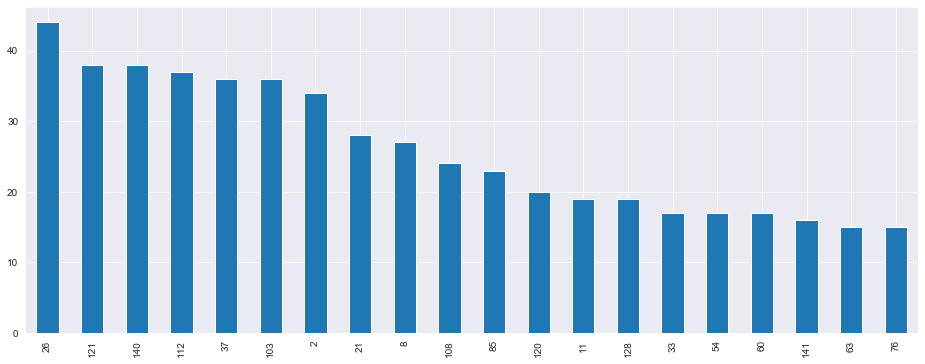

In [897]:
half_cen= half.groupby("batsman")["batsman_runs"].count().reset_index()
half_cen["batsman_runs"].nlargest(20). plot.bar()

**Gayle has highest centuries and David Warner has highest half centuries**

### 9.	Boundaries and total runs analysis

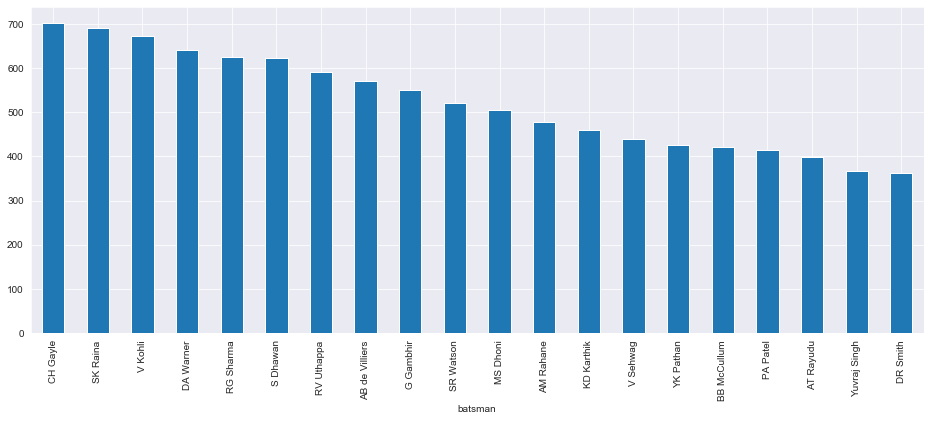

In [845]:
boundries= total[(total['batsman_runs']== 4) | (total['batsman_runs']== 6)]
boundries1= boundries.groupby("batsman")["batsman_runs"].count()
boundries1.nlargest(20).plot.bar()

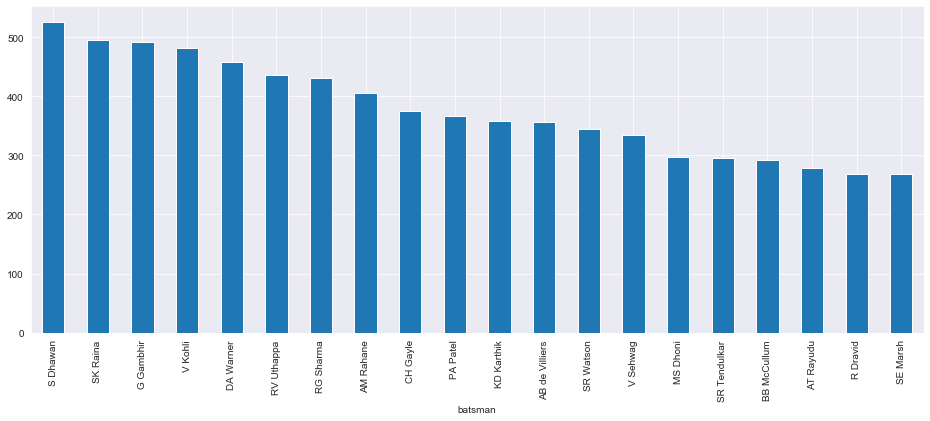

In [850]:
boundry_four= boundries[boundries["batsman_runs"]==4]
boundry_four1= boundry_four.groupby('batsman')["batsman_runs"].count()
boundry_four1.nlargest(20).plot.bar()

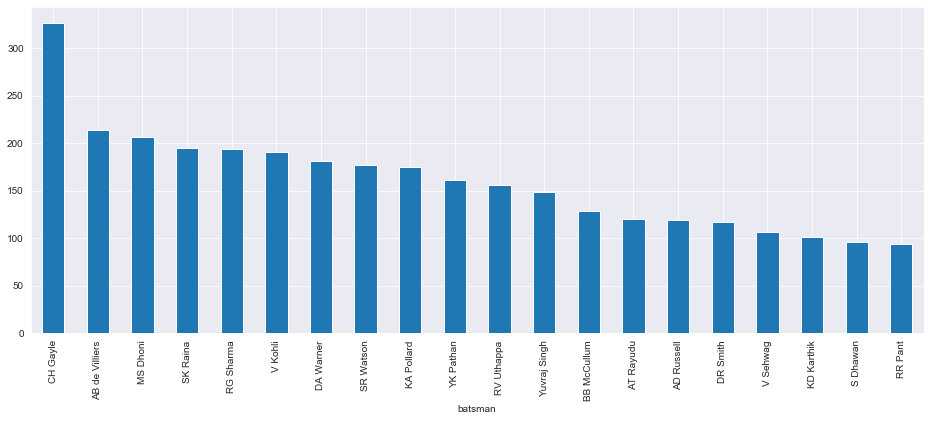

In [852]:
boundry_six= boundries[boundries["batsman_runs"]==6]
boundry_six1= boundry_six.groupby('batsman')["batsman_runs"].count()
boundry_six1.nlargest(20).plot.bar()

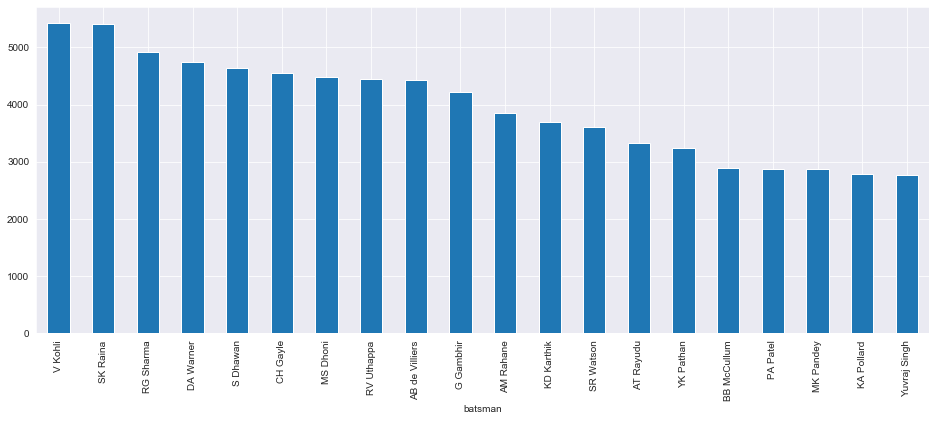

In [854]:
# Total_runs analysis
total_runs= total.groupby('batsman')["batsman_runs"].sum()
total_runs.nlargest(20).plot.bar()

Note:
- Gayle has highest sixes, fours(9th position) and scores(6th position)
- Dhawan has highest fours and low sixes but top 5th highest runs in IPL
- Kohli has highest IPL runs, sixes(6th psotion), fours(4th position)
- Rohit sharam is 3rd leading runs, top 5th sixes, top 7th fours

In [861]:
batsman_stats= batsman_stats.reset_index()
batsman_stats

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four
0,V Kohli,4211,129.042983,5434,169,32.153846,191,482
1,SK Raina,4044,133.902077,5415,189,28.650794,195,495
2,RG Sharma,3816,128.773585,4914,182,27.000000,194,431
3,DA Warner,3398,139.523249,4741,126,37.626984,181,459
4,S Dhawan,3776,122.669492,4632,158,29.316456,96,526
...,...,...,...,...,...,...,...,...
317,BJ Haddin,11,163.636364,18,1,18.000000,1,2
318,JJ van der Wath,17,105.882353,18,3,6.000000,1,1
319,S Singh,18,94.444444,17,1,17.000000,1,1
320,SD Lad,13,115.384615,15,1,15.000000,1,1


In [875]:
point= batsman_stats[["batsman", "batsman_run", "six", "four"]].reset_index()
point["points"]= (point["six"]*1)+ (point["four"]*0.5)+ (point["batsman_run"]*0.5)
point


,index,batsman,batsman_run,six,four,points
0,0,V Kohli,5434,191,482,3149.0
1,1,SK Raina,5415,195,495,3150.0
2,2,RG Sharma,4914,194,431,2866.5
3,3,DA Warner,4741,181,459,2781.0
4,4,S Dhawan,4632,96,526,2675.0
...,...,...,...,...,...,...
317,317,BJ Haddin,18,1,2,11.0
318,318,JJ van der Wath,18,1,1,10.5
319,319,S Singh,17,1,1,10.0
320,320,SD Lad,15,1,1,9.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

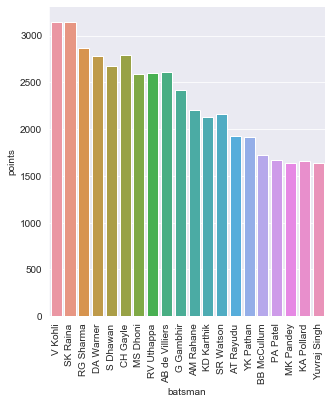

In [879]:
sns.catplot(x= "batsman", y= "points", data=point.head(20), kind="bar")
plt.xticks(rotation=90)

### 10.	Comparison between Batsman

In [944]:
one= batsman_stats.merge(cen, left_on="batsman", right_on= "batsman", how="right")
batsman_stats1= one.merge(half_cen, left_on="batsman", right_on= "batsman", how="right")
batsman_stats1.head(20)

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four,century,half_century
0,V Kohli,4211.0,129.042983,5434.0,169.0,32.153846,191.0,482.0,5.0,38
1,SK Raina,4044.0,133.902077,5415.0,189.0,28.650794,195.0,495.0,1.0,38
2,RG Sharma,3816.0,128.773585,4914.0,182.0,27.000000,194.0,431.0,1.0,36
3,DA Warner,3398.0,139.523249,4741.0,126.0,37.626984,181.0,459.0,4.0,44
4,CH Gayle,3131.0,145.640370,4560.0,124.0,36.774194,327.0,376.0,7.0,28
5,AB de Villiers,2977.0,148.740343,4428.0,142.0,31.183099,214.0,357.0,3.0,34
6,AM Rahane,3215.0,119.751166,3850.0,132.0,29.166667,74.0,405.0,2.0,27
7,KD Karthik,2890.0,127.612457,3688.0,162.0,22.765432,101.0,358.0,1.0,17
8,SR Watson,2639.0,136.945813,3614.0,130.0,27.800000,177.0,344.0,4.0,19
9,AT Rayudu,2681.0,124.058187,3326.0,138.0,24.101449,120.0,278.0,1.0,19


In [923]:
batsman_stats1["total_points"]= (batsman_stats1["century"]*8) + (batsman_stats1["half_century"]*4) + (batsman_stats1["six"]*1) + (batsman_stats1["four"]*0.5) + (batsman_stats1["batsman_run"]*0.5)
batsman_stats1

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four,century,half_century,total_points
0,V Kohli,4211.0,129.042983,5434.0,169.0,32.153846,191.0,482.0,5.0,38,3341.0
1,SK Raina,4044.0,133.902077,5415.0,189.0,28.650794,195.0,495.0,1.0,38,3310.0
2,RG Sharma,3816.0,128.773585,4914.0,182.0,27.000000,194.0,431.0,1.0,36,3018.5
3,DA Warner,3398.0,139.523249,4741.0,126.0,37.626984,181.0,459.0,4.0,44,2989.0
4,CH Gayle,3131.0,145.640370,4560.0,124.0,36.774194,327.0,376.0,7.0,28,2963.0
...,...,...,...,...,...,...,...,...,...,...,...
144,V Shankar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
145,VVS Laxman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
146,W Jaffer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
147,Y Venugopal Rao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN


In [942]:
batsman_stats1.sort_values("four", ascending=False, inplace=True)
batsman_stats1

,batsman,ball,strike_rate,batsman_run,match_count,average_score,six,four,century,half_century
1,SK Raina,4044.0,133.902077,5415.0,189.0,28.650794,195.0,495.0,1.0,38
0,V Kohli,4211.0,129.042983,5434.0,169.0,32.153846,191.0,482.0,5.0,38
3,DA Warner,3398.0,139.523249,4741.0,126.0,37.626984,181.0,459.0,4.0,44
2,RG Sharma,3816.0,128.773585,4914.0,182.0,27.000000,194.0,431.0,1.0,36
6,AM Rahane,3215.0,119.751166,3850.0,132.0,29.166667,74.0,405.0,2.0,27
...,...,...,...,...,...,...,...,...,...,...
144,V Shankar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
145,VVS Laxman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
146,W Jaffer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
147,Y Venugopal Rao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [950]:
three= batsman_stats1[(batsman_stats1["batsman"]== "V Kohli") | (batsman_stats1["batsman"]== "RG Sharma") | (batsman_stats1["batsman"]== "CH Gayle")]
three.set_index("batsman", inplace=True)
three

,ball,strike_rate,batsman_run,match_count,average_score,six,four,century,half_century
batsman,,,,,,,,,
V Kohli,4211.0,129.042983,5434.0,169.0,32.153846,191.0,482.0,5.0,38
RG Sharma,3816.0,128.773585,4914.0,182.0,27.000000,194.0,431.0,1.0,36
CH Gayle,3131.0,145.640370,4560.0,124.0,36.774194,327.0,376.0,7.0,28


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


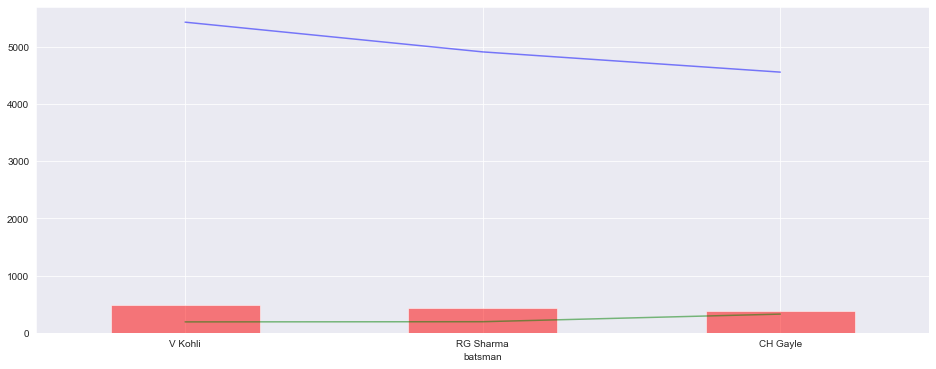

In [959]:
three["batsman_run"].plot(color="B", alpha=0.5)
three["four"].plot.bar(color="R", alpha=0.5)
three["six"].plot(color="G", alpha=0.5)

# Bowlers Analysis

### 11.	Best Bowler in Each category (top 20 wicket takers)

In [963]:
total.head()

,season,winner,toss_decision,toss_winner,team1,match_id,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,Sunrisers Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [1007]:
bowler= total.groupby("bowler").sum().reset_index()
bowl=total["bowler"].value_counts().reset_index()
bowler= bowler.merge(bowl, left_on="bowler", right_on= "index", how="left")
bowler= bowler[["bowler_x", "total_runs", "bowler_y"]]
bowler.rename({"bowler_x": "bowler_name", "total_runs": "runs_given", "bowler_y": "balls"}, axis=1, inplace=True)
bowler["overs"]= bowler["balls"]//6
bowler

,bowler_name,runs_given,balls,overs
0,A Ashish Reddy,400,270,45
1,A Chandila,245,234,39
2,A Choudhary,144,108,18
3,A Dananjaya,48,25,4
4,A Flintoff,106,66,11
...,...,...,...,...
400,YA Abdulla,311,222,37
401,YK Pathan,1443,1184,197
402,YS Chahal,2416,1841,306
403,Yuvraj Singh,1092,882,147


In [984]:
# wicket taking
dismissal_kind= ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct= total[total["dismissal_kind"].isin(dismissal_kind)]
ct= ct["bowler"].value_counts().reset_index()


In [1008]:
bowler= bowler.merge(ct, left_on= "bowler_name", right_on= "index", how= "left").dropna()
bowler= bowler[["bowler_name", "runs_given", "overs", "bowler"]]
bowler.rename({"bowler":"wickets"}, axis=1, inplace=True)
bowler["economy"]= round(bowler["runs_given"]/bowler["overs"],2)
bowler

,bowler_name,runs_given,overs,wickets,economy
0,A Ashish Reddy,400,45,18.0,8.89
1,A Chandila,245,39,11.0,6.28
2,A Choudhary,144,18,5.0,8.00
4,A Flintoff,106,11,2.0,9.64
5,A Joseph,94,9,6.0,10.44
...,...,...,...,...,...
400,YA Abdulla,311,37,15.0,8.41
401,YK Pathan,1443,197,42.0,7.32
402,YS Chahal,2416,306,100.0,7.90
403,Yuvraj Singh,1092,147,36.0,7.43


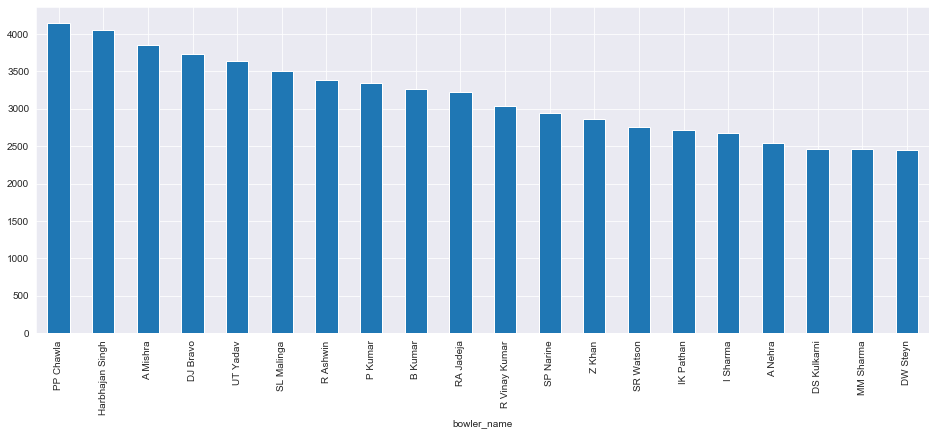

In [998]:
# Top run given bowler
bowl_top= bowler.sort_values("runs_given", ascending=False)
bowl_top["runs_given"].nlargest(20).plot.bar()

In [1010]:
top_wicket= bowler.sort_values("wickets", ascending=False).head(20)
top_wicket

,bowler_name,runs_given,overs,wickets,economy
340,SL Malinga,3511,495,170.0,7.09
7,A Mishra,3850,528,156.0,7.29
126,Harbhajan Singh,4050,575,150.0,7.04
264,PP Chawla,4153,526,149.0,7.90
93,DJ Bravo,3733,451,147.0,8.28
53,B Kumar,3264,451,133.0,7.24
269,R Ashwin,3391,502,125.0,6.75
347,SP Narine,2939,433,122.0,6.79
381,UT Yadav,3640,434,119.0,8.39
282,RA Jadeja,3221,423,108.0,7.61


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

<Figure size 1440x432 with 0 Axes>

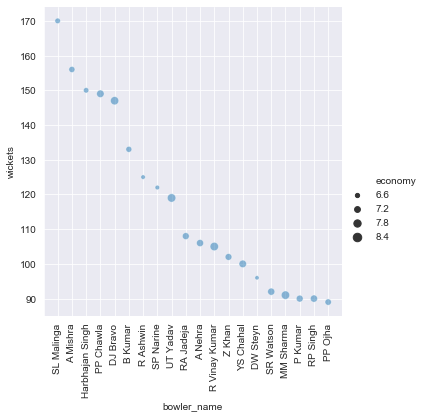

In [1013]:
# Top wicket taker
plt.figure(figsize=(20,6))
sns.relplot(x="bowler_name", y="wickets", size="economy", alpha=.5, palette="muted", data=top_wicket)
plt.xticks(rotation=90)

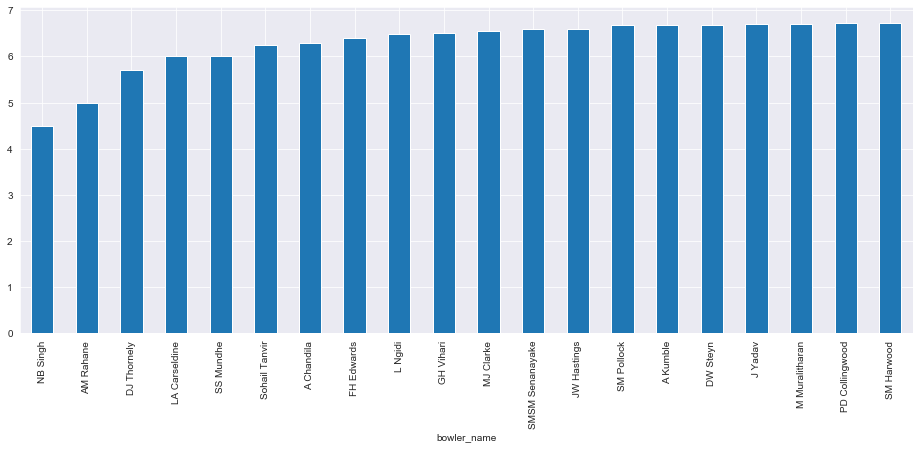

In [1001]:
# Best economy
bowler["economy"].nsmallest(20).plot.bar()

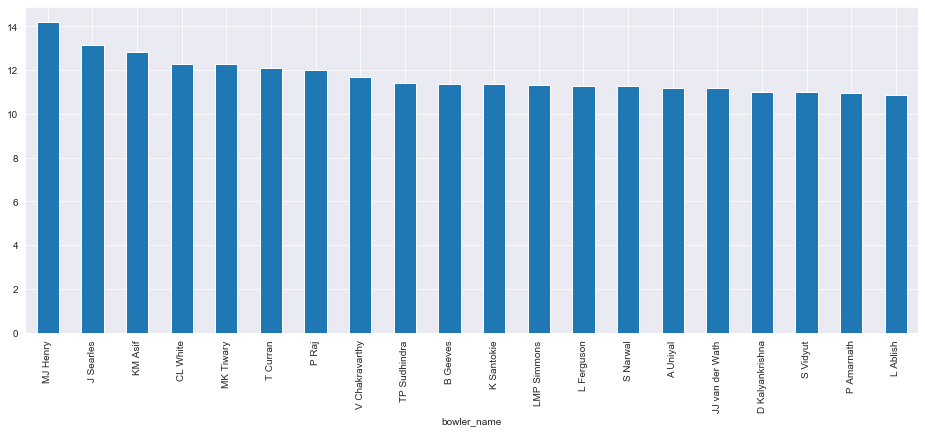

In [1002]:
# worst economy
bowler["economy"].nlargest(20).plot.bar()

### 12.	Purple Cap Holders

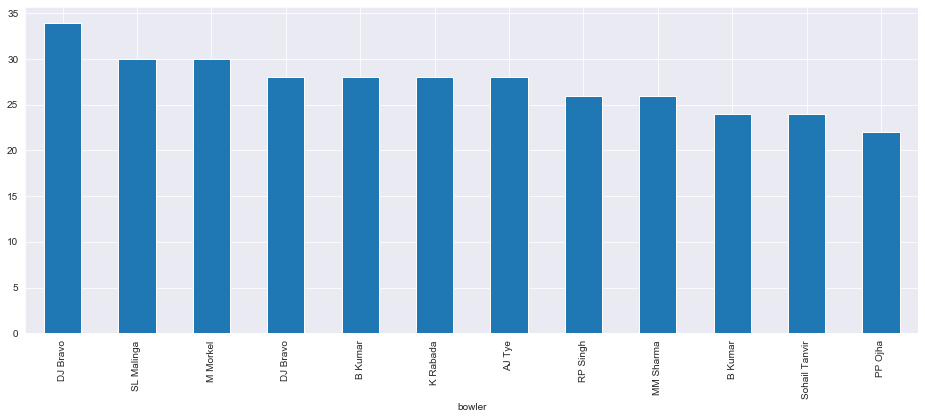

In [1022]:
purple= total.groupby(["season", "bowler"])["player_dismissed"].count().reset_index()
purple.sort_values("player_dismissed", ascending=0, inplace=True)
purple= purple.drop_duplicates(subset= ["season"], keep="first")
purple.set_index("bowler", inplace=True)
purple['player_dismissed'].plot.bar()

# Fielder Analysis

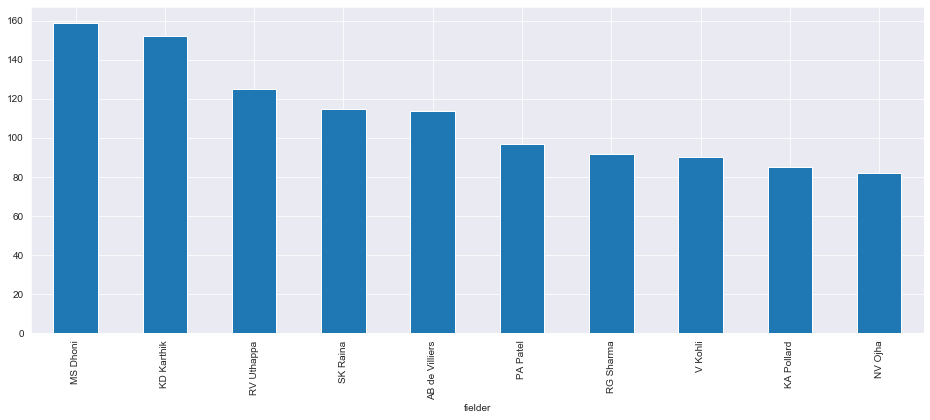

In [1043]:
field= total.groupby("fielder")["dismissal_kind"].count().reset_index()
field.set_index('fielder', inplace=True)
field["dismissal_kind"].nlargest(10).plot.bar()

In [1066]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Winner Analysis

In [1077]:
season_winner=mat.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner.sort_values("season", ascending=True, inplace=True)
season_winner

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [1079]:
season_winner["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

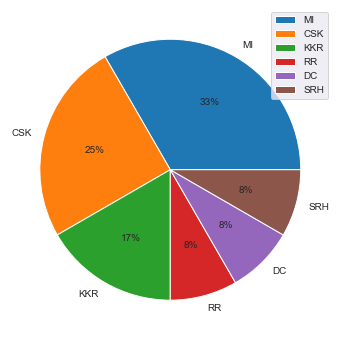

In [1083]:
size= ["4", "3", "2", "1", "1", "1"]
labels= ["MI", "CSK", "KKR", "RR", "DC", "SRH"]
plt.pie(size, labels=labels, autopct= "%1.f%%")
plt.legend()